## LOGISTIC REGRESSION

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Load the data
df = pd.read_csv("data\\Airline_customer_satisfaction.csv")

Data is loaded into dataframe DF - let's go on the exploration journey!

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

Most of the columns seem to be numerical but a lot can be categorical, and only "Arrival Delay in Minutes" seems to have some missing values, but since the missing values are less than 1%, I am going to drop those.

In [3]:
df = df.dropna()

Our target variable is [satisfaction]. It's now an object, but we need to make this binary for classification purposes.

In [4]:
#labelencoding our target variable

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['satisfaction'] = le.fit_transform(df['satisfaction'])

In this case I'm not specifiying the 1 or 0, because "dissatisfied" comes earlier in the alphabet, and that seems to be how labelencoder from sklearn handles the values.

In [5]:
df['satisfaction'].value_counts()

satisfaction
1    70882
0    58605
Name: count, dtype: int64

Let's check our numerical features one by one by plotting them on a histogram. I will make a list again to check which transformations will be done afterwards.

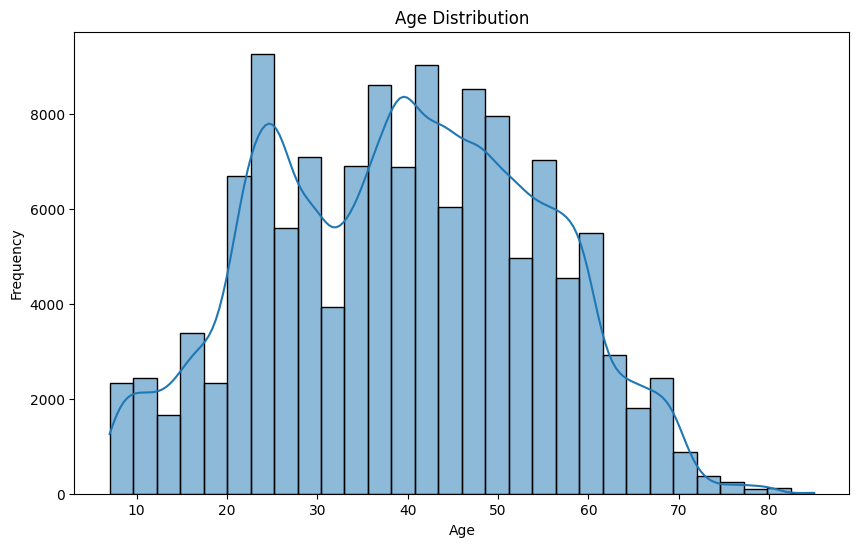

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Not too much extreme outliers, so these will be standardscaled. Next one is [Flight Distance]

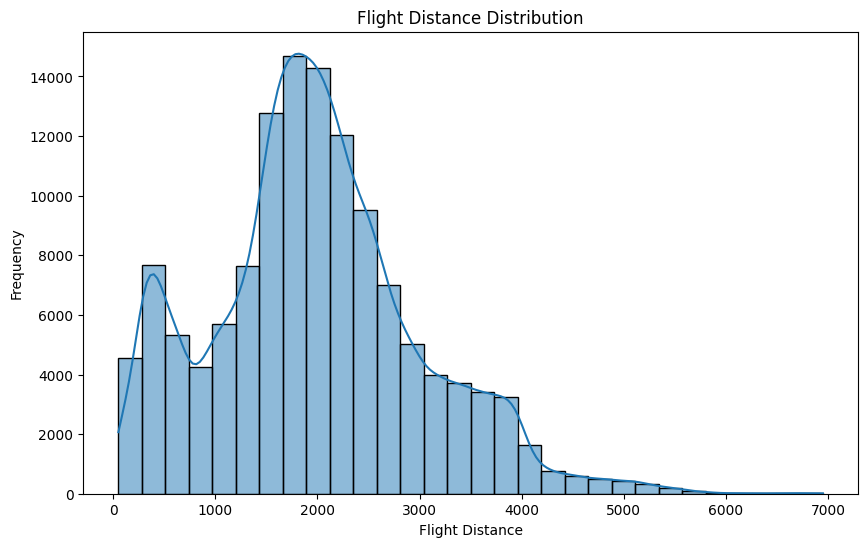

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Flight Distance'], bins=30, kde=True)
plt.title('Flight Distance Distribution')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.show()

Right skew, so after split I will apply log normalisation and StandardScaler

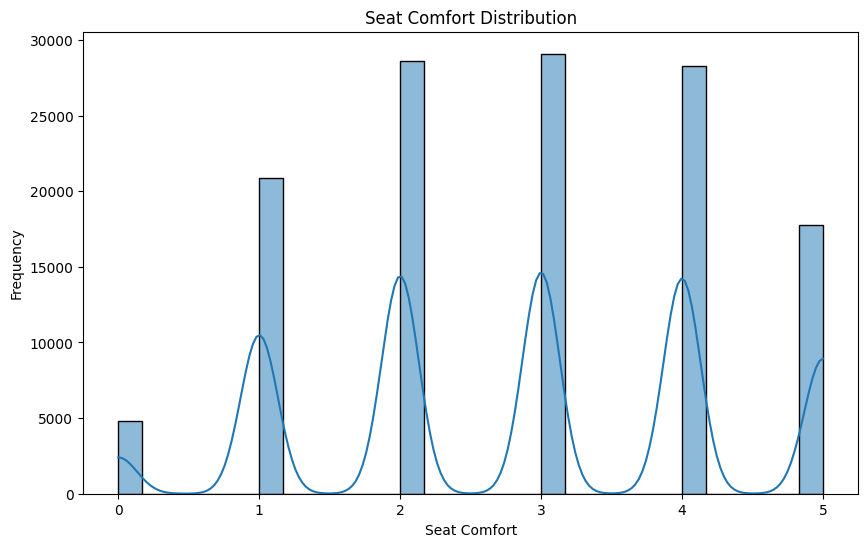

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Seat comfort'], bins=30, kde=True)
plt.title('Seat Comfort Distribution')
plt.xlabel('Seat Comfort')
plt.ylabel('Frequency')
plt.show()

This is clearly actually a categorical value, so this one has to be an object for now, but is cleary ordinal.

In [10]:
df['Seat comfort'] = df['Seat comfort'].astype('str')

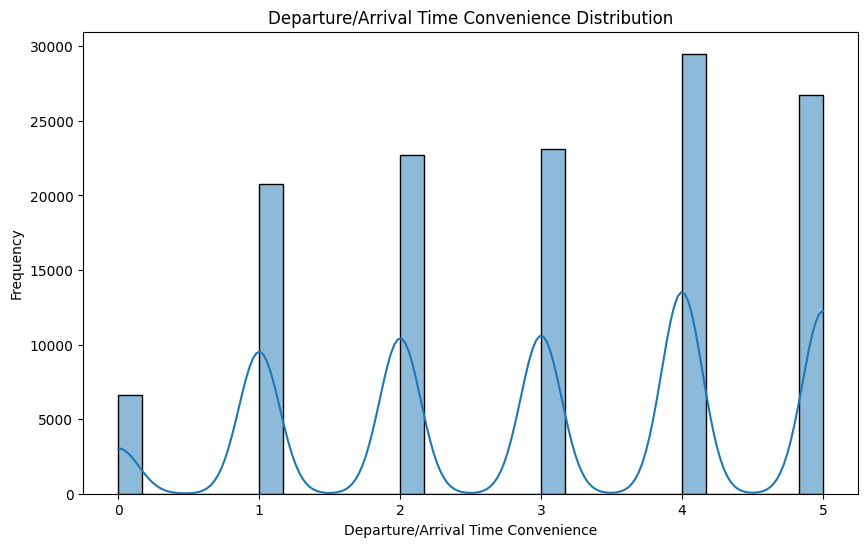

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Departure/Arrival time convenient'], bins=30, kde=True)
plt.title('Departure/Arrival Time Convenience Distribution')
plt.xlabel('Departure/Arrival Time Convenience')
plt.ylabel('Frequency')
plt.show()

Same here - make it as string and later encode, ordinal.

In [12]:
df['Departure/Arrival time convenient'] = df['Departure/Arrival time convenient'].astype('str')

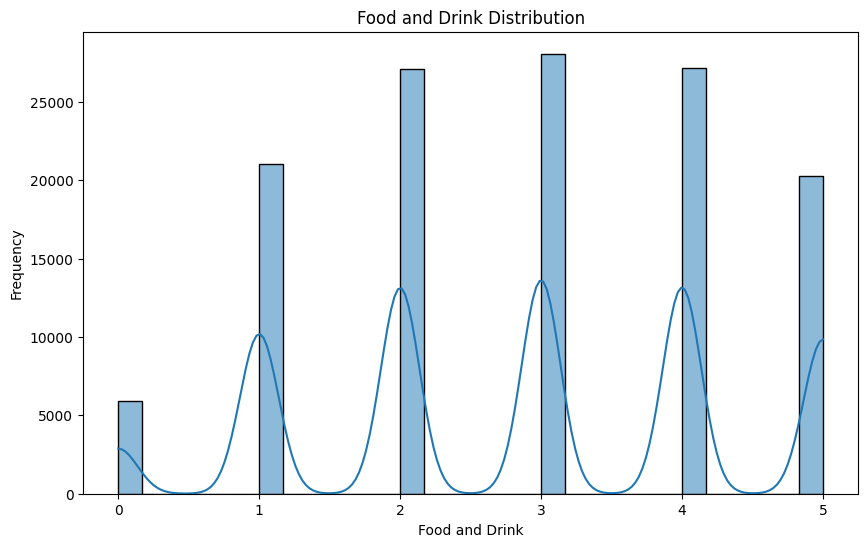

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Food and drink'], bins=30, kde=True)
plt.title('Food and Drink Distribution')
plt.xlabel('Food and Drink')
plt.ylabel('Frequency')
plt.show()

In [17]:
df['Food and drink'] = df['Food and drink'].astype('str')

Same. On my list, ordinal.

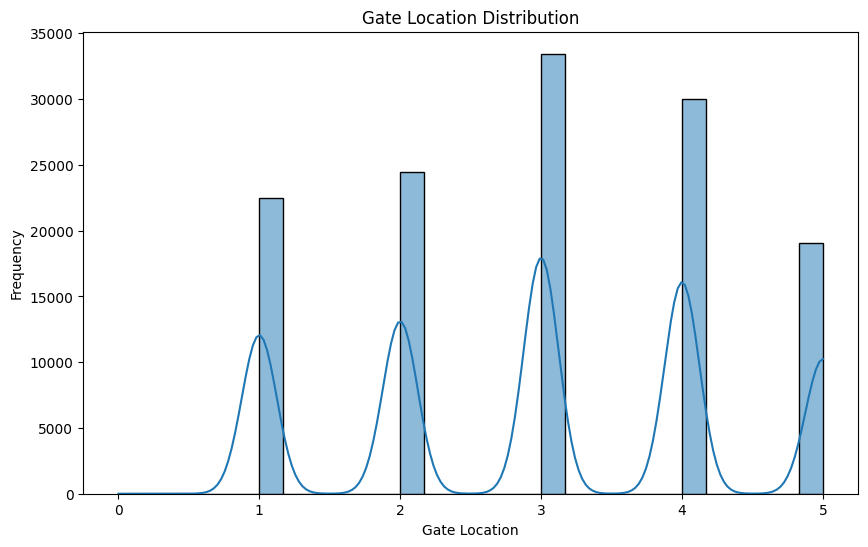

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Gate location'], bins=30, kde=True)
plt.title('Gate Location Distribution')
plt.xlabel('Gate Location')
plt.ylabel('Frequency')
plt.show()

In [18]:
df['Gate location'] = df['Gate location'].astype('str')

Same but I don't think location can be seen as ordinal, rather just an ID of the gate. So this one is for one hot encoding.

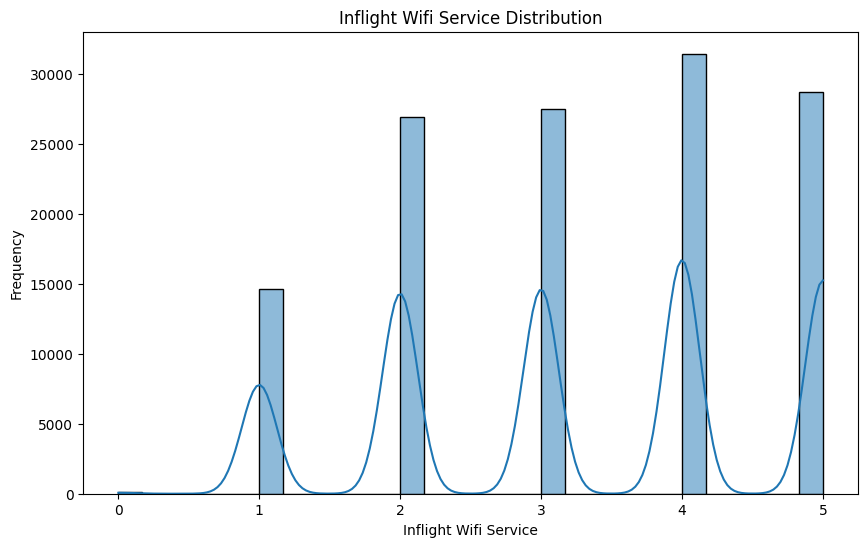

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Inflight wifi service'], bins=30, kde=True)
plt.title('Inflight Wifi Service Distribution')
plt.xlabel('Inflight Wifi Service')
plt.ylabel('Frequency')
plt.show()

In [19]:
df['Inflight wifi service'] = df['Inflight wifi service'].astype('str')

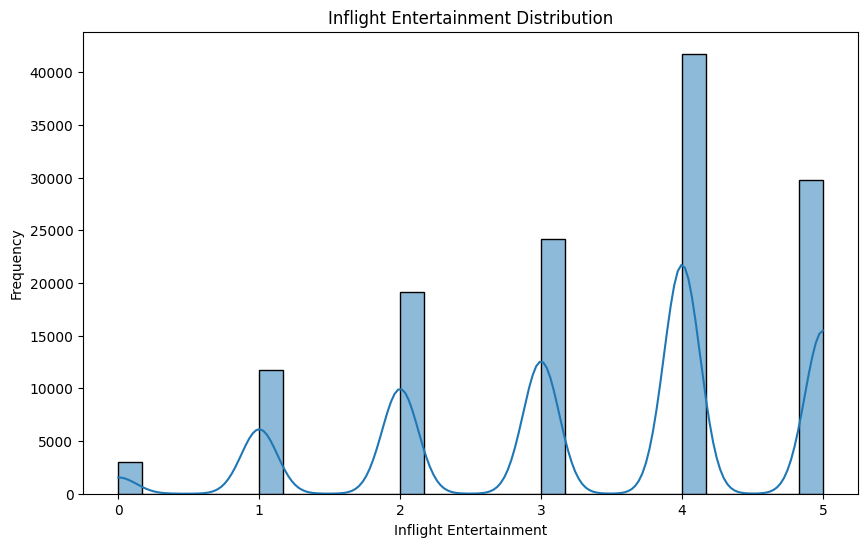

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Inflight entertainment'], bins=30, kde=True)
plt.title('Inflight Entertainment Distribution')
plt.xlabel('Inflight Entertainment')
plt.ylabel('Frequency')
plt.show()

In [20]:
df['Inflight entertainment'] = df['Inflight entertainment'].astype('str')

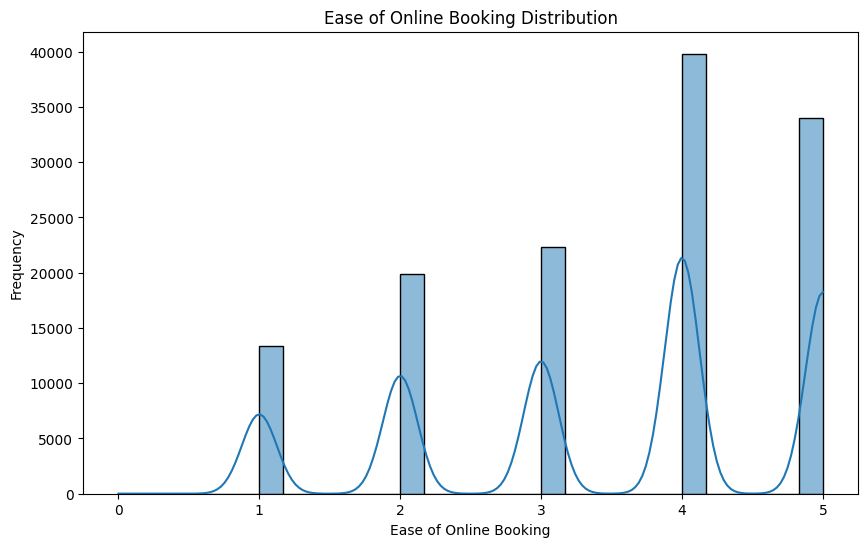

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Ease of Online booking'], bins=30, kde=True)
plt.title('Ease of Online Booking Distribution')
plt.xlabel('Ease of Online Booking')
plt.ylabel('Frequency')
plt.show()

In [22]:
df['Ease of Online booking'] = df['Ease of Online booking'].astype('str')

These are all categories, but clearly ordinal

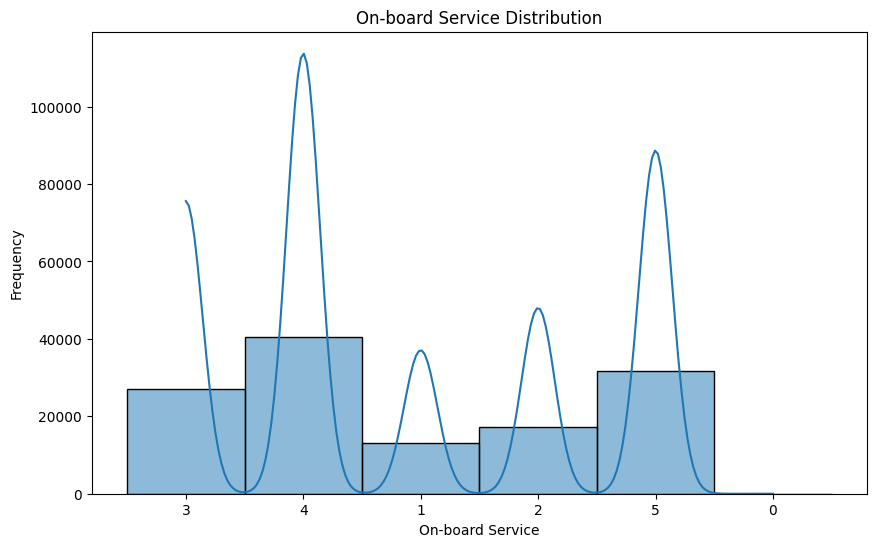

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['On-board service'], bins=30, kde=True)
plt.title('On-board Service Distribution')
plt.xlabel('On-board Service')
plt.ylabel('Frequency')
plt.show()

In [24]:
df['On-board service'] = df['On-board service'].astype('str')

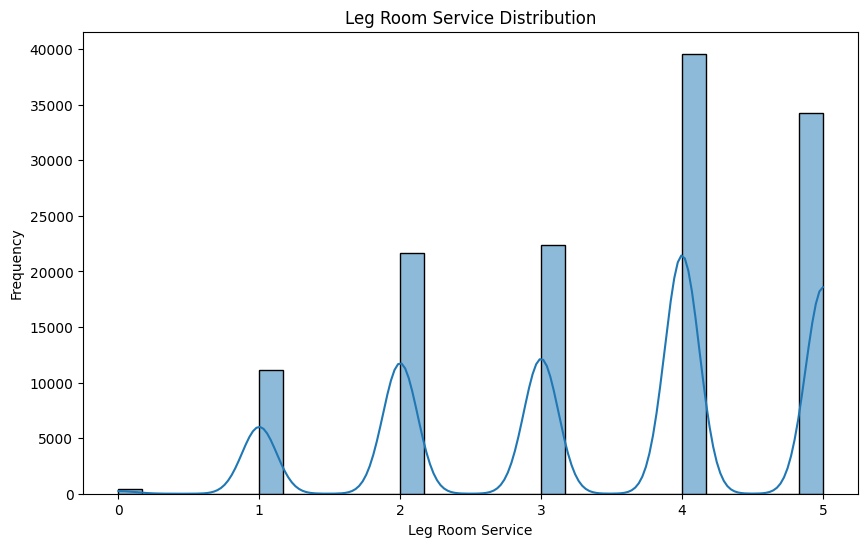

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Leg room service'], bins=30, kde=True)
plt.title('Leg Room Service Distribution')
plt.xlabel('Leg Room Service')
plt.ylabel('Frequency')
plt.show()

In [28]:
df['Leg room service'] = df['Leg room service'].astype('str')

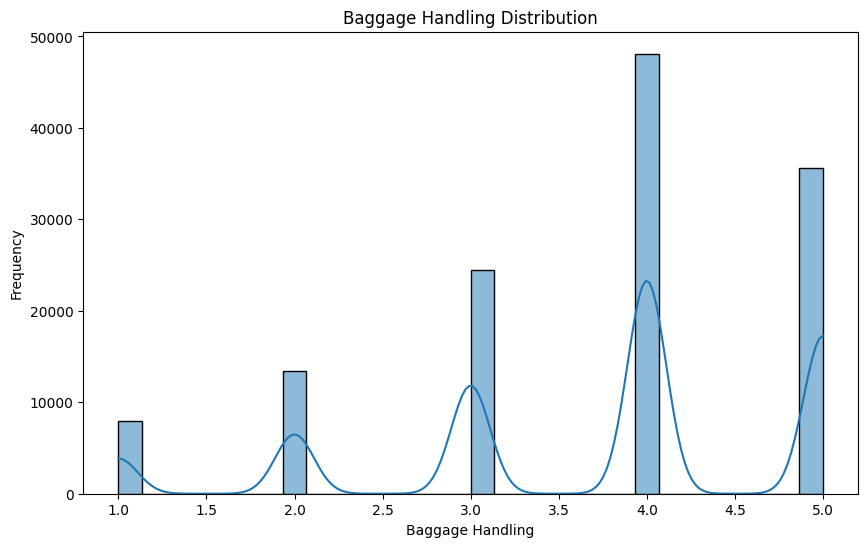

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Baggage handling'], bins=30, kde=True)
plt.title('Baggage Handling Distribution')
plt.xlabel('Baggage Handling')
plt.ylabel('Frequency')
plt.show()

In [30]:
df['Baggage handling'] = df['Baggage handling'].astype('str')

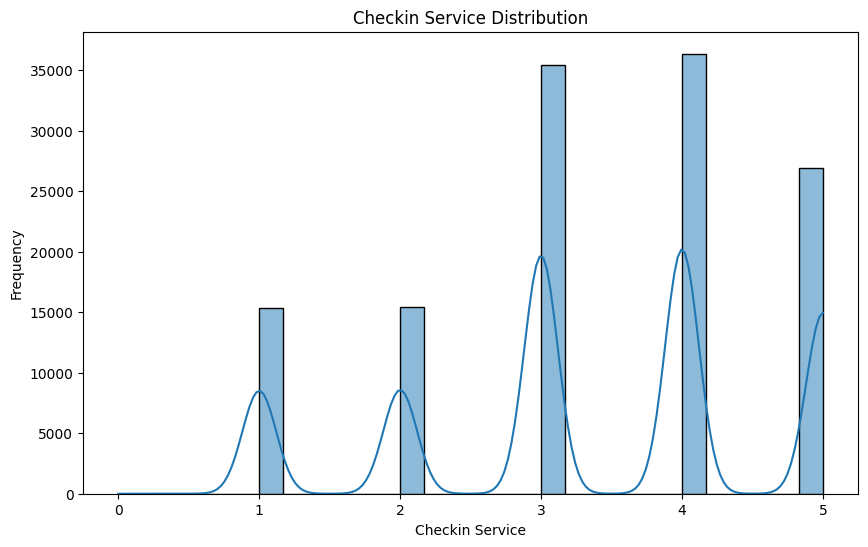

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Checkin service'], bins=30, kde=True)
plt.title('Checkin Service Distribution')
plt.xlabel('Checkin Service')
plt.ylabel('Frequency')
plt.show()

In [33]:
df['Checkin service'] = df['Checkin service'].astype('str')

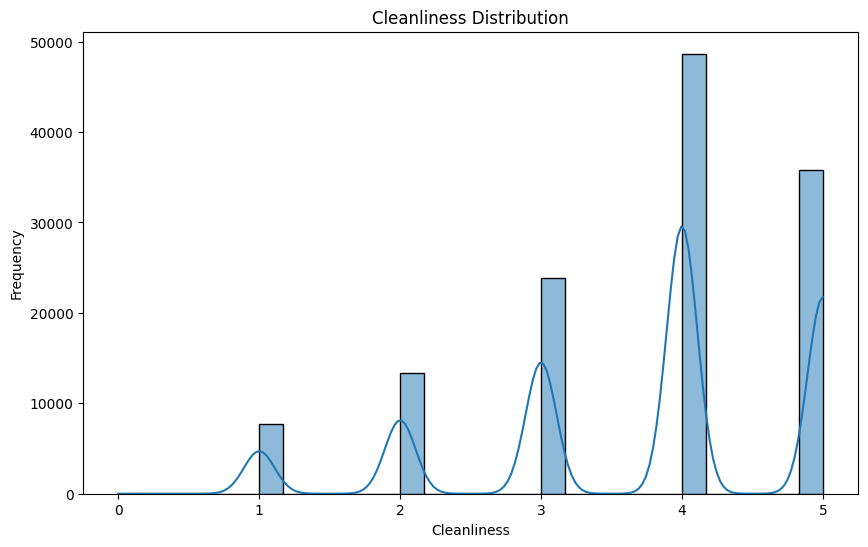

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Cleanliness'], bins=30, kde=True)
plt.title('Cleanliness Distribution')
plt.xlabel('Cleanliness')
plt.ylabel('Frequency')
plt.show()

In [34]:
df['Cleanliness'] = df['Cleanliness'].astype('str')

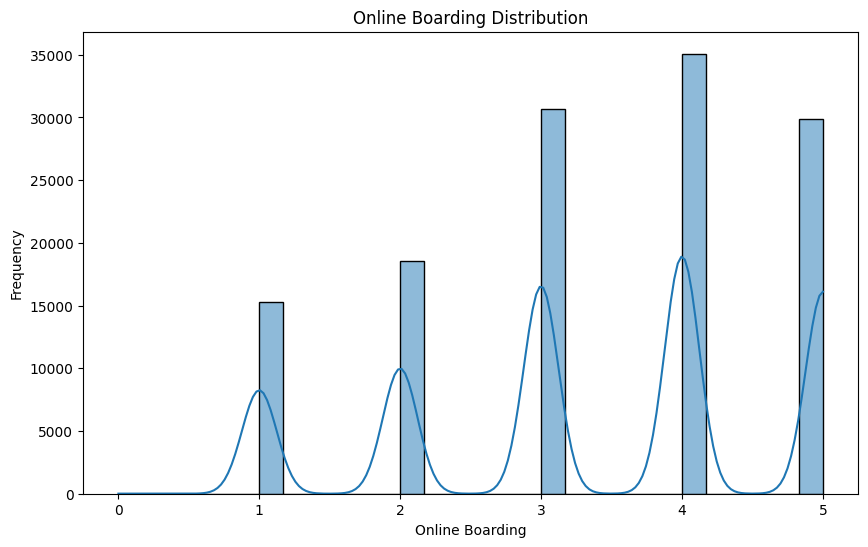

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Online boarding'], bins=30, kde=True)
plt.title('Online Boarding Distribution')
plt.xlabel('Online Boarding')
plt.ylabel('Frequency')
plt.show()

In [36]:
df['Online boarding'] = df['Online boarding'].astype('str')

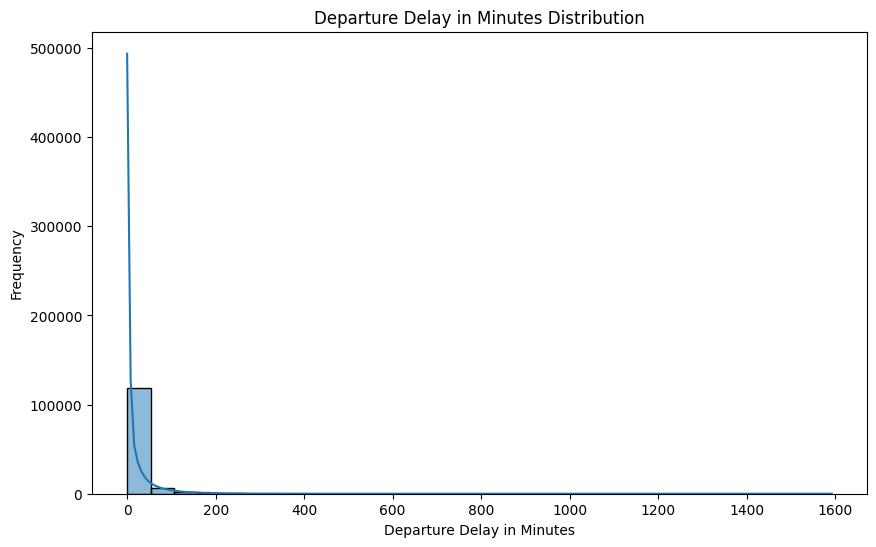

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Departure Delay in Minutes'], bins=30, kde=True)
plt.title('Departure Delay in Minutes Distribution')
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Frequency')
plt.show()

Extreme skewness, will let go through log norm and then SS

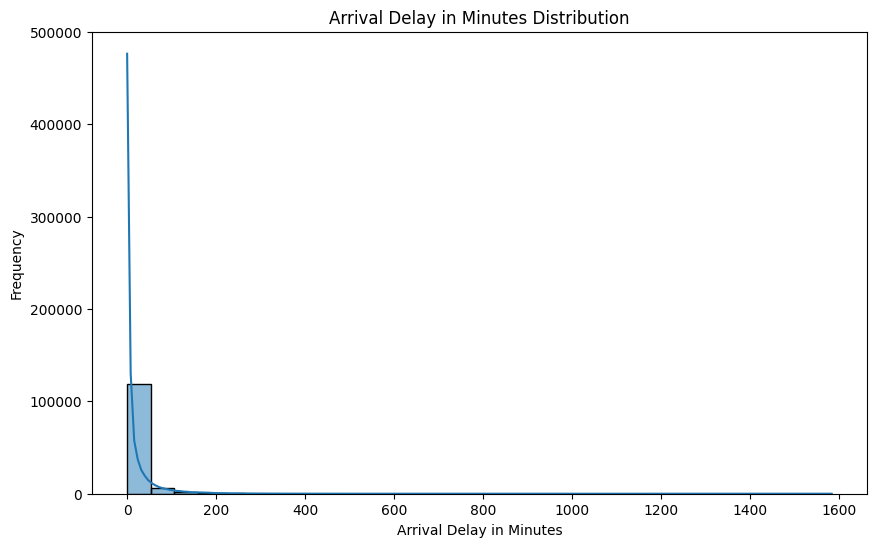

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Arrival Delay in Minutes'], bins=30, kde=True)
plt.title('Arrival Delay in Minutes Distribution')
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Frequency')
plt.show()

Same. Let's check again now, I think I divided already okay, but never hurts to dubbelcheck.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  int64  
 1   Customer Type                      129487 non-null  object 
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  object 
 4   Class                              129487 non-null  object 
 5   Flight Distance                    129487 non-null  int64  
 6   Seat comfort                       129487 non-null  object 
 7   Departure/Arrival time convenient  129487 non-null  object 
 8   Food and drink                     129487 non-null  object 
 9   Gate location                      129487 non-null  object 
 10  Inflight wifi service              129487 non-null  object 
 11  Inflight entertainment             129487 no

Just need those last 3 categoricals to check.

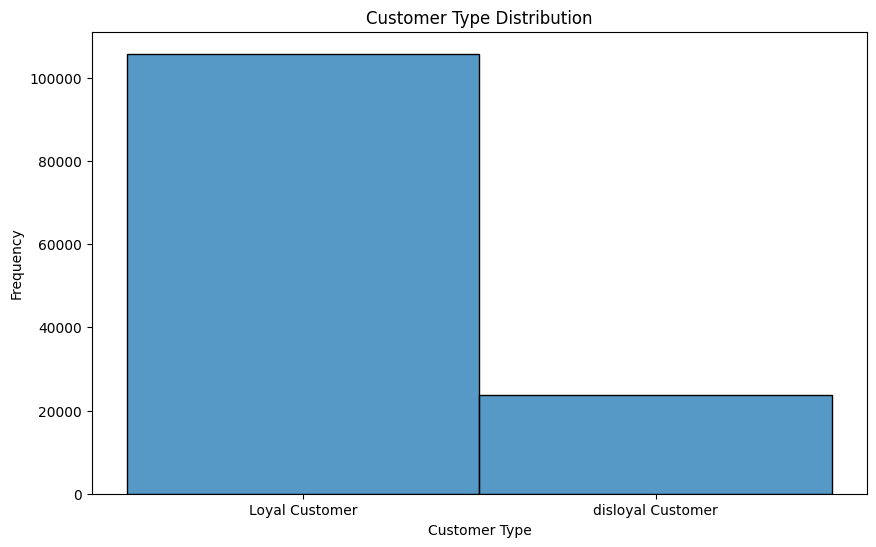

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer Type'], kde=False)
plt.title('Customer Type Distribution')
plt.xlabel('Customer Type')
plt.ylabel('Frequency')
plt.show()

Will be label encoded.

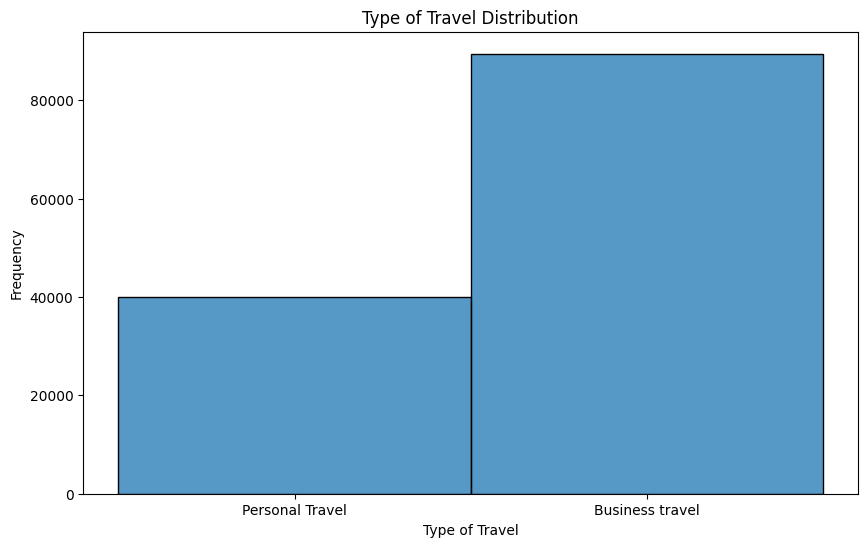

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Type of Travel'], kde=False)
plt.title('Type of Travel Distribution')
plt.xlabel('Type of Travel')
plt.ylabel('Frequency')
plt.show()

Same. Binary, so just labelencoded. Last one!

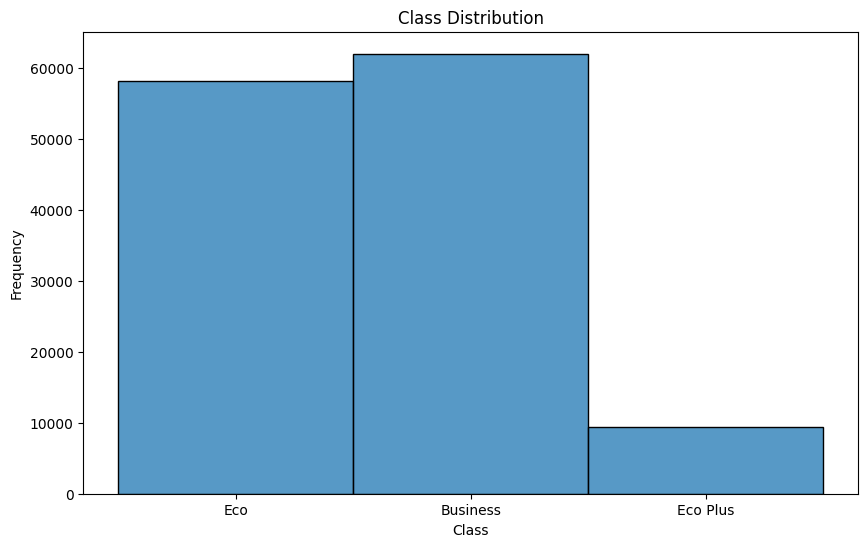

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Class'], kde=False)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

This is actually an ordinal catagory, but it doesn't matter too much in this case, so one hot encoding.

Ready for my pipeline!

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split


standard_features = ['Age']
log_norm_features = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
onehot_features = ['Gate location', 'Class']
label_features = ['Type of Travel', 'Customer Type']
ordinal_features = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Inflight wifi service', 
                    'Inflight entertainment', 'Ease of Online booking', 'On-board service', 'Leg room service', 
                    'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']


log_transformer = Pipeline(steps=[
    ('log', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', StandardScaler())
])

standard_transformer = StandardScaler()

onehot_transformer = OneHotEncoder(handle_unknown='ignore')

label_transformer = OrdinalEncoder() 

ordinal_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer([
    ('standard', standard_transformer, standard_features),
    ('lognorm', log_transformer, log_norm_features),
    ('onehot', onehot_transformer, onehot_features),
    ('label', label_transformer, label_features),
    ('ordinal', ordinal_transformer, ordinal_features)
])


X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


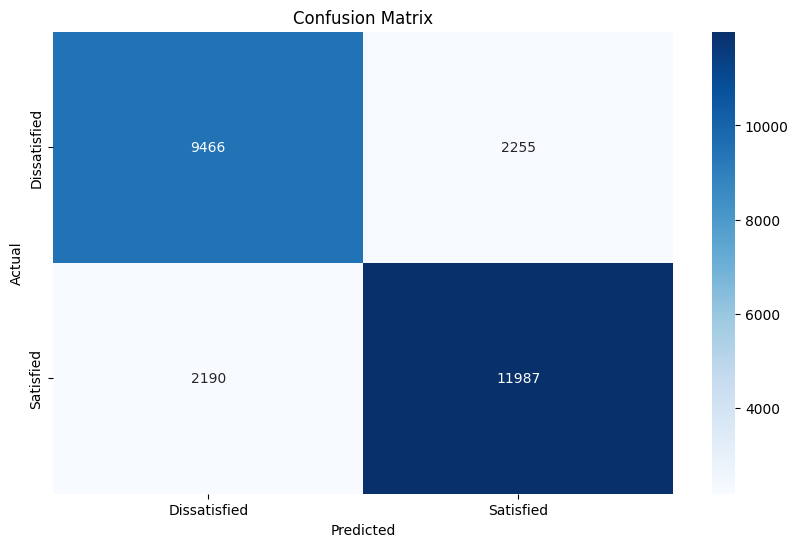

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     11721
           1       0.84      0.85      0.84     14177

    accuracy                           0.83     25898
   macro avg       0.83      0.83      0.83     25898
weighted avg       0.83      0.83      0.83     25898



In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report


model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_transformed, y_train)

y_pred = model.predict(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Dissatisfied', 'Satisfied'], yticklabels=['Dissatisfied', 'Satisfied'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

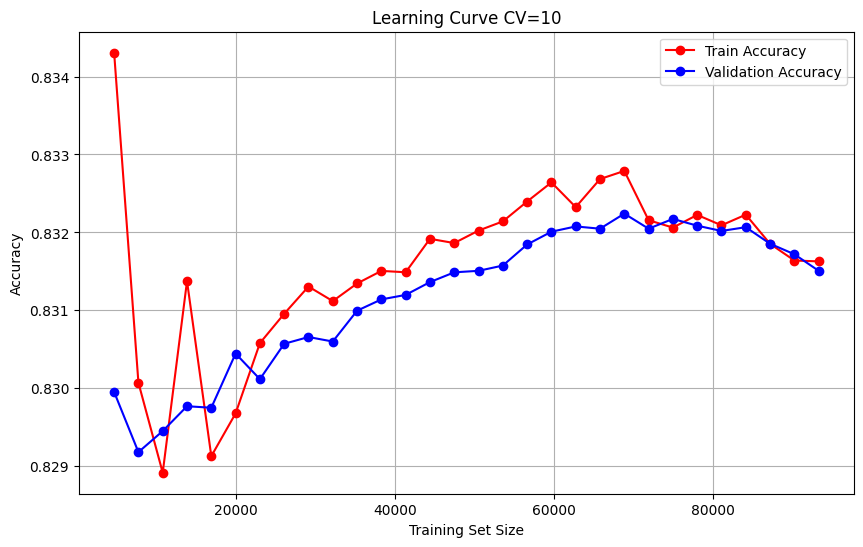

In [48]:
from sklearn.model_selection import learning_curve

train_sizes = np.linspace(0.05, 1.0, 30)

train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(max_iter=1000), X_train_transformed, y_train,
    train_sizes=train_sizes, scoring='accuracy', cv=10
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'r-', marker='o', label='Train Accuracy')
plt.plot(train_sizes, test_mean, 'b-', marker='o', label='Validation Accuracy')


plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve CV=10")
plt.legend()
plt.grid(True)
plt.show()
